In [1]:
'''
Author information:
Joey R. Muffoletto
University of Texas at Austin
Autonomous Systems Group
jrmuff@utexas.edu
'''


'\nAuthor information:\nJoey R. Muffoletto\nUniversity of Texas at Austin\nAutonomous Systems Group\njrmuff@utexas.edu\n'

In [2]:
'''
imports
'''
import sys
import os
sys.path.insert(0, os.path.abspath('C:\\Users\\Joey\\PycharmProjects\\Automata-Testing'))
import copy
import optimization_functions
import graph_manager
import graph_test_methods
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

c:\users\joey\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\joey\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\joey\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
'''
Globals/System variables
'''

NUM_TOWERS = 5 
RUNS_PER_DATA_POINT = 1
BATCH_SIZES = [1, 5, 10, 15] #how many time steps to parse for tower matches

# batch size stuff -> show how batch size effects optimality
# change to time increments (batch size based on time increment)
# take the sum of the cost vs. batch size, keep synthesis time around (average time per batch)
# should show that as batch size goes down, cost goes up, but synthesis time goes down

#DESTINATIONS = ['K'+ str(i) for i in range(1, NUM_TOWERS+1)] #randomize this?
# DESTINATIONS = dict()
# for i in range(1, NUM_TOWERS+1):
#     DESTINATIONS['K' + str(i)] = []

# DATA indicies
EVENT_TIME_INDEX = 0
ORIGIN_INDEX = 1
DESTINATION_INDEX = 2
DEPARTURE_TIME_INDEX = 3
NUM_PASSENGERS_INDEX = 4


In [4]:
'''
Read NASA data
'''
import csv
import copy
import random

DESTINATIONS = {'K4' : [], 'K6' : [], 'K10' : [], 'K11' : [], 'K14': []}

# print(DESTINATIONS)

data = open('data/scn_UAM_testNewVT.trp', 'r')


reader = csv.reader(data)
next(reader) #skip headers
next(reader) #skip units

# structure = destinations_per_batch_size_per_batch[batch_size_index][batch_index] = destination_dict
destinations_per_batch_size_per_batch = [[copy.deepcopy(DESTINATIONS)] for i in range(len(BATCH_SIZES))]
# print(type(destinations_per_batch_size_per_batch[0]))

# print(destinations_per_batch_size_per_batch)
# time_stamp_per_batch_size = [0 for i in range(len(BATCH_SIZES))]
# previous_time = 21633 # first time in file
request_counter = 0
was_a_request = False
random.seed(10)
time_step_batch_start = [21633 for i in range(len(BATCH_SIZES))]
is_new_batch = [False for i in range(len(BATCH_SIZES))]
for row in reader:    
#     for index, time_stamp in enumerate(time_stamp_per_batch_size):
#         if time_stamp >= BATCH_SIZES[index]:
#             destinations_per_batch_size_per_batch[index].append(copy.deepcopy(DESTINATIONS))
#             time_stamp_per_batch_size[index] = 0
    # 
    for index, batch_size in enumerate(BATCH_SIZES):
        if was_a_request and request_counter % batch_size == 0:
            destinations_per_batch_size_per_batch[index].append(copy.deepcopy(DESTINATIONS))
            is_new_batch[index] = True
    eventTime, origin, destination, desiredDepartureTime, numPassengers = row

        
    if destination in DESTINATIONS.keys():            
        for index in range(len(destinations_per_batch_size_per_batch)):
            if is_new_batch[index]:
                time_step_batch_start = desiredDepartureTime
            last_item_index = len(destinations_per_batch_size_per_batch[index]) - 1 
            destinations_per_batch_size_per_batch[index][last_item_index][destination].append(random.randint(0,5))
        request_counter+=1
        was_a_request = True
    else:
        was_a_request = False

print(len(destinations_per_batch_size_per_batch[0]))
print("")
print(len(destinations_per_batch_size_per_batch[1]))
for row in destinations_per_batch_size_per_batch[1]:
    for key in row.keys():
        print(len(row[key]))

350

70
1
4
0
0
0
0
5
0
0
0
1
1
2
1
0
1
2
1
1
0
0
3
1
0
1
0
5
0
0
0
0
1
2
0
2
2
2
1
0
0
0
2
3
0
0
2
1
0
1
1
0
3
1
1
0
2
2
0
0
1
2
3
0
0
0
2
1
1
0
1
0
4
0
1
0
1
2
1
0
1
3
2
0
0
0
2
0
1
2
0
3
0
1
0
1
0
4
0
1
0
2
1
2
0
0
2
2
1
0
0
0
5
0
0
0
2
3
0
0
0
2
0
2
0
1
1
3
1
0
0
0
2
1
0
2
0
1
1
1
2
0
2
1
1
1
1
2
1
0
1
1
2
0
0
2
2
2
0
0
1
4
1
0
0
0
3
0
1
0
1
3
0
1
0
1
4
0
0
0
1
3
1
1
0
0
4
1
0
0
0
4
0
0
0
1
2
3
0
0
0
1
4
0
0
0
4
1
0
0
0
2
2
1
0
0
3
2
0
0
0
2
2
0
1
0
3
1
0
1
0
4
1
0
0
0
2
1
0
1
1
0
5
0
0
0
2
1
1
1
0
2
0
0
1
2
4
0
0
0
1
3
0
0
1
1
2
1
0
1
1
1
1
2
0
1
1
0
1
2
1
1
0
0
2
2
1
3
0
1
0
1
1
0
2
1
1
0
0
1
3
1
0
0
1
3
2
0
1
0
2
0
1
2
0
2
1
0
2
0
2
0
0
3
0
2
0
1
2
1
1
1
1
0
0
3
1
1
0
1
2
1
0
0
0
4
0
0
1
1
2


In [5]:
'''
Create a system per interval

current choices:
    - requests have no preference
    - one port per tower with 3 capacity
    - request time is equal to index + 1, capped at 5. for 7 requests = [1,2,3,4,5,5,5]
'''


system_per_batch_per_interval = [[] for i in range(len(BATCH_SIZES))]

TIME_CAP = 3
REQ_CAP = 9999
for index, system_per_interval in enumerate(system_per_batch_per_interval):
    print("\n\nnew request batch size " + str(BATCH_SIZES[index]))
    for count, row in enumerate(destinations_per_batch_size_per_batch[index]):
        print("new system " + str(count))
        system = []
        for key in row.keys():
        #graph_manager.return_tower_specific(port_dict, req_per_step, request_vec, time_req)
            port_dict = {'0' : 10}
            req_per_step = 1
            request_vec = []
            for count, i in enumerate(row[key]):
                if count >= REQ_CAP:
                    break
                request_vec.append('no_pref')
            
            time_vec = []
            for time in row[key]:
                time_vec.append(time * BATCH_SIZES[index] / BATCH_SIZES[len(BATCH_SIZES)-1])
#                 if index == 0:
#                     if time % 2 == 0:
#                         time_vec.append(time/2)
#                     else:
#                         time_vec.append((time-1)/2)
#                 else:
#                     time_vec.append(time)
            print(time_vec)
            assert(len(request_vec) == len(time_vec))
#             print("new tower")
            tower = graph_manager.return_tower_specific(port_dict, req_per_step, request_vec, time_vec)
            system.append(tower)
        assert(len(system) == len(row.keys()))
        system_per_interval.append(system)
        print(system)





new request batch size 1
new system 0
[]
[0.26666666666666666]
[]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6729B70>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751E10>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751FD0>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751048>, <reworked_graph.ReworkedGraph object at 0x0000019AB67510B8>]
new system 1
[]
[0.26666666666666666]
[]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67512E8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751320>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751630>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751518>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751908>]
new system 2
[]
[0.2]
[]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6751A90>, <reworked_graph.ReworkedGraph object at 0x0000019AB6751978>, <reworked_graph.ReworkedGraph object at 0x0000019AB648FB00>, <reworked_graph.ReworkedGraph object at 0x0000019AB6

new system 278
[0.0]
[]
[]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67510F0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67A9128>, <reworked_graph.ReworkedGraph object at 0x0000019AB67A95F8>, <reworked_graph.ReworkedGraph object at 0x0000019AB67A9860>, <reworked_graph.ReworkedGraph object at 0x0000019AB67A9DD8>]
new system 279
[]
[]
[]
[0.2]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67B72E8>, <reworked_graph.ReworkedGraph object at 0x0000019AB67B7828>, <reworked_graph.ReworkedGraph object at 0x0000019AB67B7DA0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67C4470>, <reworked_graph.ReworkedGraph object at 0x0000019AB67CB160>]
new system 280
[]
[]
[]
[0.26666666666666666]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67CB7F0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67CBAC8>, <reworked_graph.ReworkedGraph object at 0x0000019AB67D3080>, <reworked_graph.ReworkedGraph object at 0x0000019AB67D34A8>, <reworked_graph.ReworkedGrap

[<reworked_graph.ReworkedGraph object at 0x0000019AB6A1CC50>, <reworked_graph.ReworkedGraph object at 0x0000019AB6A1CF28>, <reworked_graph.ReworkedGraph object at 0x0000019AB6A11048>, <reworked_graph.ReworkedGraph object at 0x0000019AB6A110F0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67A9550>]
new system 345
[]
[]
[]
[0.13333333333333333]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67B7240>, <reworked_graph.ReworkedGraph object at 0x0000019AB67C4DA0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67D3DA0>, <reworked_graph.ReworkedGraph object at 0x0000019AB67BAD30>, <reworked_graph.ReworkedGraph object at 0x0000019AB67F4080>]
new system 346
[]
[]
[]
[]
[0.3333333333333333]
[<reworked_graph.ReworkedGraph object at 0x0000019AB67F94A8>, <reworked_graph.ReworkedGraph object at 0x0000019AB67FFFD0>, <reworked_graph.ReworkedGraph object at 0x0000019AB680DE10>, <reworked_graph.ReworkedGraph object at 0x0000019AB681B6D8>, <reworked_graph.ReworkedGraph object at 0x0000

[]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6BCEF60>, <reworked_graph.ReworkedGraph object at 0x0000019AB6BD4278>, <reworked_graph.ReworkedGraph object at 0x0000019AB6BD46D8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA2FD0>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA2E48>]
new system 1
[0.0, 0.6666666666666666]
[0.0, 1.3333333333333333, 2.6666666666666665]
[1.3333333333333333, 2.6666666666666665, 2.6666666666666665]
[0.6666666666666666, 2.6666666666666665]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6CA25F8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA2550>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA2A90>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA8630>, <reworked_graph.ReworkedGraph object at 0x0000019AB6CA8F98>]
new system 2
[]
[0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 2.0, 3.3333333333333335, 0.6666666666666666]
[0.6666666666666666]
[]
[2.0]
[<reworked_graph.ReworkedGr

[1.3333333333333333, 2.0]
[0.6666666666666666]
[]
[]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6EB6668>, <reworked_graph.ReworkedGraph object at 0x0000019AB6EC36D8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6EBC208>, <reworked_graph.ReworkedGraph object at 0x0000019AB6EDE8D0>, <reworked_graph.ReworkedGraph object at 0x0000019AB6EDEE10>]
new system 19
[2.6666666666666665, 0.0, 2.0, 3.3333333333333335, 0.6666666666666666, 2.0]
[3.3333333333333335, 3.3333333333333335, 2.6666666666666665]
[]
[]
[2.6666666666666665]
[<reworked_graph.ReworkedGraph object at 0x0000019AB6EE42E8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6EE44A8>, <reworked_graph.ReworkedGraph object at 0x0000019AB6F01978>, <reworked_graph.ReworkedGraph object at 0x0000019AB6F08C88>, <reworked_graph.ReworkedGraph object at 0x0000019AB6F08BA8>]
new system 20
[3.3333333333333335, 2.0, 0.0, 0.0, 2.0]
[2.6666666666666665, 0.6666666666666666, 0.6666666666666666, 2.6666666666666665, 0.0]
[]
[]
[]
[<rewor

[1.0, 4.0]
[2.0]
[1.0]
[<reworked_graph.ReworkedGraph object at 0x0000019AB70C3BE0>, <reworked_graph.ReworkedGraph object at 0x0000019AB70C3DD8>, <reworked_graph.ReworkedGraph object at 0x0000019AB70C3E80>, <reworked_graph.ReworkedGraph object at 0x0000019AB7107CC0>, <reworked_graph.ReworkedGraph object at 0x0000019AB7111710>]
new system 2
[1.0, 3.0]
[2.0, 4.0, 4.0, 0.0, 5.0]
[3.0, 5.0, 3.0, 3.0, 3.0, 3.0]
[]
[4.0, 5.0]
[<reworked_graph.ReworkedGraph object at 0x0000019AB7111550>, <reworked_graph.ReworkedGraph object at 0x0000019AB7111748>, <reworked_graph.ReworkedGraph object at 0x0000019AB71114E0>, <reworked_graph.ReworkedGraph object at 0x0000019AB7115978>, <reworked_graph.ReworkedGraph object at 0x0000019AB711E908>]
new system 3
[5.0, 2.0, 5.0, 2.0]
[4.0, 2.0, 5.0, 4.0, 3.0, 4.0]
[1.0]
[2.0, 4.0]
[1.0, 2.0]
[<reworked_graph.ReworkedGraph object at 0x0000019AB7123DA0>, <reworked_graph.ReworkedGraph object at 0x0000019AB7113B00>, <reworked_graph.ReworkedGraph object at 0x0000019AB712

[<reworked_graph.ReworkedGraph object at 0x0000019AB76B8F98>, <reworked_graph.ReworkedGraph object at 0x0000019AB7728668>, <reworked_graph.ReworkedGraph object at 0x0000019AB772ED30>, <reworked_graph.ReworkedGraph object at 0x0000019AB7732198>, <reworked_graph.ReworkedGraph object at 0x0000019AB7732240>]
new system 23
[]
[]
[1.0]
[3.0]
[5.0, 2.0]
[<reworked_graph.ReworkedGraph object at 0x0000019AB7732550>, <reworked_graph.ReworkedGraph object at 0x0000019AB77B9F98>, <reworked_graph.ReworkedGraph object at 0x0000019AB77B9C88>, <reworked_graph.ReworkedGraph object at 0x0000019AB77B9BE0>, <reworked_graph.ReworkedGraph object at 0x0000019AB77B9FD0>]


In [6]:
'''
Sum total cost of batch
'''

costs_per_system_per_batch = []
minimized_cost_per_system_per_batch = []
time_per_system_per_batch = []
num_rounds_per_system_per_batch = []
for index, batch_size in enumerate(BATCH_SIZES):
    costs_per_system_per_batch.append([])
    time_per_system_per_batch.append([])
    num_rounds_per_system_per_batch.append([])
    minimized_cost_per_system_per_batch.append([])
    for system in system_per_batch_per_interval[index]:
        graph_manager.reset_globals()
        total_time, num_rounds, minimized_cost_vec, system_timings, cost_vec_per_round = graph_manager.run_minimizing_mvp(
            copy.deepcopy(system),
            rollout_index=0
        )
        costs_per_system_per_batch[index].append(copy.deepcopy(cost_vec_per_round))
        time_per_system_per_batch[index].append(copy.deepcopy(system_timings))
        num_rounds_per_system_per_batch[index].append(copy.deepcopy(num_rounds))
        minimized_cost_per_system_per_batch[index].append(copy.deepcopy(minimized_cost_vec))
        assert(minimized_cost_vec == cost_vec_per_round[len(cost_vec_per_round)-1])

Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: ['no_pref'] and times of [0.26666666666666666] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower i

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0418327000000005
	round 0 breakdown :: 
	 tower 0 took 0.0031892999999953986 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.4499999998918156e-05 to find most expensive request and took 0.009139799999992704 to synthesize with published request
	 tower 2 took 5.100000002755678e-06 to find most expensive request and took 0.008681900000006237 to synthesize with published request
	 tower 3 took 3.4000000042055945e-06 to find most expensive request and took 0.00937940000000026 to synthesize with published request
	 tower 4 took 2.9999999995311555e-06 to find most expensive request and took 0.009592200000007267 to synthesize wit

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04743770000000325
	round 0 breakdown :: 
	 tower 0 took 0.0014713000000057264 to find most expensive request and took 0.001864899999993952 to synthesize with published request
	 tower 1 took 0.0020234000000058927 to find most expensive request and took 0.011399099999998441 to synthesize with published request
	 tower 2 took 1.8399999994755944e-05 to find most expensive request and took 0.009321900000003325 to synthesize with published request
	 tower 3 took 9.300000002099296e-06 to find most expensive request and took 0.010060199999998076 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04653120000000399
	round 0 breakdown :: 
	 tower 0 took 0.0014657999999982962 to find most expensive request and took 0.0017240999999970086 to synthesize with published request
	 tower 1 took 4.4999999957440195e-06 to find most expensive request and took 0.009036599999994621 to synthesize with published request
	 tower 2 took 2.6999999960253263e-06 to find most expensive request and took 0.008880000000004884 to synthesize with published request
	 tower 3 took 0.0017700000000004934 to find most expensive request and took 0.011937500000001933 to synthesize with published request
	 tower 4 took 3.7999999946691787e-06 to find most expensive request and took 0.009637499999996635 to synthesize wit

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04633760000000109
	round 0 breakdown :: 
	 tower 0 took 0.001434400000000835 to find most expensive request and took 0.0017119000000036522 to synthesize with published request
	 tower 1 took 2.8999999983625457e-06 to find most expensive request and took 0.009204799999999125 to synthesize with published request
	 tower 2 took 0.0017374000000032197 to find most expensive request and took 0.012070899999997664 to synthesize with publi

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04770340000000317
	round 0 breakdown :: 
	 tower 0 took 0.0016741000000024542 to find most expensive request and took 0.0017780000000016116 to synthesize with published request
	 tower 1 took 4.400000001680837e-06 to find most expensive request and took 0.009060200000000407 to synthesize with published request
	 tower 2 took 2.6999999960253263e-06 to find most expensive request and took 0.008966699999987782 to synthesize with published request
	 tower 3 took 0.0017508999999975572 to find most expensive request and took 0.01180150000000424 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04835229999999768
	round 0 breakdown :: 
	 tower 0 took 0.0015591000000014787 to find most expensive request and took 0.001954999999995266 to synthesize with published request
	 tower 1 took 6.8000000013057615e-06 to find most expensive request and took 0.009306999999992627 to synthesize with published request
	 tower 2 took 0.001729900000000839 to find most expensive request and took 0.011604299999980583 to synthesize with published request
	 tower 3 took 7.800000005886432e-06 to find most expensive request and took 0.009883600000009096 to synthesize with published request
	 tower 4 took 4.300000000512227e-06 to find most expensive request and took 0.009235099999990837 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04990420000000029
	round 0 breakdown :: 
	 tower 0 took 0.001629600000001119 to find most expensive request and took 0.0017546999999993318 to synthesize with published request
	 tower 1 took 0.0019911999999990826 to find most expensive request and took 0.01157070000000715 to synthesize with published request
	 tower 2 took 3.3000000030369847e-06 to find most expensive request and took 0.009362099999997042 to synthesize with published request
	 tower 3 took 2.2999999984563146e-06 to find most expensive request and took 0.011688800000008825 to synthesize with published request
	 tower 4 took 2.500000000793534e-06 to find most expensive request and took 0.01012259999999543 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.047713999999999146
	round 0 breakdown :: 
	 tower 0 took 0.0015214000000014494 to find most expensive request and took 0.0019492999999997096 to synthesize with published request
	 tower 1 took 3.999999997006398e-06 to find most expensive request and took 0.010209699999997213 to synthesize with published request
	 tower 2 took 2.500000000793534e-06 to find most expensive request and took 0.008969499999999186 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0.009243899999994198 to synthesize with published request
	 tower 4 took 0.0018969999999995935 to find most expensive request and took 0.011970799999993176 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0483094999999949
	round 0 breakdown :: 
	 tower 0 took 0.0014376000000027034 to find most expensive request and took 0.0021209000000013134 to synthesize with published request
	 tower 1 took 6.100000000230921e-06 to find most expensive request and took 0.009179800000012506 to synthesize with published request
	 tower 2 took 0.0019190000000008922 to find most expensive request and took 0.01116429999999724 to synthesize with published request
	 tower 3 took 8.399999998687235e-06 to find most expensive request and took 0.00979319999999717 to synthesize with publis

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04973499999999831
	round 0 breakdown :: 
	 tower 0 took 0.001480000000000814 to find most expensive request and took 0.0017543000000017628 to synthesize with published request
	 tower 1 took 0.0017860000000027298 to find most expensive request and took 0.01205639999999164 to synthesize with published request
	 tower 2 took 8.900000004530284e-06 to find most expensive request and took 0.010043599999995934 to synthesize with published request
	 tower 3 took 3.8999999958377884e-06 to find most expensive request and took 0.010938299999992296 to synthesize with published request
	 tower 4 took 3.3000000030369847e-06 to find most expensive request and took 0.009841299999990838 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.047851600000001326
	round 0 breakdown :: 
	 tower 0 took 0.0015689999999963788 to find most expensive request and took 0.0019159000000001924 to synthesize with published request
	 tower 1 took 0.0020299000000036926 to find most expensive request and took 0.012054000000006226 to synthesize with published request
	 tower 2 took 5.800000003830519e-06 to find most expensive request and took 0.009462500000005036 to synthesize with publ

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04786140000000216
	round 0 breakdown :: 
	 tower 0 took 0.001459400000001665 to find most expensive request and took 0.001968800000000215 to synthesize with published request
	 tower 1 took 4.400000001680837e-06 to find most expensive request and took 0.009098600000001511 to synthesize with published re

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.05328020000000322
	round 0 breakdown :: 
	 tower 0 took 0.0014747999999968897 to find most expensive request and took 0.0019993000000013694 to synthesize with published request
	 tower 1 took 3.800000001774606e-06 to find most expensive request and took 0.010073299999994845 to synthesize with published request
	 tower 2 took 2.199999997287705e-06 to find most expensive request and took 0.010600900000000024 to synthesize with published request
	 tower 3 took 0.0019659000000018523 to find most expensive request and took 0.014016200000000367 to synthesize with published request
	 tower 4 took 5.50000000032469e-06 to find most expensive request and took 0.009832699999996919 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.05095510000000303
	round 0 breakdown :: 
	 tower 0 took 0.001526900000001774 to find most expensive request and took 0.0024718000000021334 to synthesize with published request
	 tower 1 took 0.0021270000000015443 to find most expensive request and took 0.011903099999983624 to synthesize with published request
	 tower 2 took 5.200000003924288e-06 to find most expensive request and took 0.010201799999990158 to synthesize with publis

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04359419999999403
	round 0 breakdown :: 
	 tower 0 took 0.0040990000000036275 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.899999995368944e-06 to find most expensive request and took 0.009050600000001907 to synthesize with published request
	 tower 2 took 2.4999999936881068e-06 to find most expensive request and took 0.008693999999998425 to synthesize with published request
	 tower 3 took 2.3999999996249244e-06 to find most expensive request and took 0.008980700000009278 to synthesize with published request
	 tower 4 took 6.499999997799932e-06 to find most expensive request and took 0.010181299999985072 to synthesize wi

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04392310000000066
	round 0 breakdown :: 
	 tower 0 took 0.003111499999995715 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.700000000137152e-06 to find most expensive request and took 0.010257699999989711 to synthesize with published

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04421380000000141
	round 0 breakdown :: 
	 tower 0 took 0.003216799999997022 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.50000000490536e-06 to find most expensive request and took 0.009388800000003528 to synthesize with published request
	 tower 2 took 2.2000000043931323e-06 to find most expensive request and took 0.009376099999997223 to synthesize with published request
	 tower 3 took 2.1000000032245225e-06 to find most expensive request and took 0.011646799999986968 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04816199999999782
	round 0 breakdown :: 
	 tower 0 took 0.0016565999999968994 to find most expensive request and took 0.0018643999999952143 to synthesize with published request
	 tower 1 took 0.001814000000003091 to find most expensive request and took 0.010863899999996818 to synthesize with published request
	 tower 2 took 4.699999998081239e-06 to find most expensive request and took 0.009781200000006152 to synthesize with published request
	 tower 3 took 3.699999993500569e-06 to find most expensive request and took 0.00917530000000255 to synthesize with published request
	 tower 4 took 2.5999999948567165e-06 to find most expensive request and took 0.010148200000010377 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0016565999999968994 ,published 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04647839999999803
	round 0 breakdown :: 
	 tower 0 took 0.0015094000000033247 to find most expensive request and took 0.0019470000000012533 to synthesize with published request
	 tower 1 took 9.599999998499698e-06 to find most expensive request and took 0.008883400000016195 to synthesize with published request
	 tower 2 took 0.0019047000000043113 to find most expensive request and took 0.011387700000000223 to synthesize with published request
	 tower 3 took 7.400000001211993e-06 to find most expensive request and took 0.009948600000008412 to synthesize with published request
	 tower 4 took 3.1000000006997652e-06 to find most expensive request and took 0.008785899999999458 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04475549999999373
	round 0 breakdown :: 
	 tower 0 took 0.0033519000000055144 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 8.199999996350016e-06 to find most expensive request and took 0.009202800000004174 to synthesize with published request
	 tower 2 took 3.499999998268777e-06 to find most expensive request and took 0.008972100000001149 to synthesize with published request
	 tower 3 took 2.8999999983625457e-06 to find most expensive request and took 0.0104430000000022 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04388500000000306
	round 0 breakdown :: 
	 tower 0 took 0.0034948999999997454 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 8.100000002286833e-06 to find most expensive request and took 0.009486400000014328 to synthesize with published request
	 tower 2 took 2.8999999983625457e-06 to find most expensive request and took 0.009079499999998575 to synthesize with published request
	 tower 3 took 3.200000001868375e-06 to find most expensive request and took 0.010821399999997539 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04817440000000062
	round 0 breakdown :: 
	 tower 0 took 0.0017010999999982346 to find most expensive request and took 0.0019123999999948182 to synthesize with published request
	 tower 1 took 5.100000002755678e-06 to find most expensive request and took 0.008949499999999944 to synthesize with published request
	 tower 2 took 3.399999997100167e-06 to find most expensive request and took 0.009349799999995412 to synthesize with published request
	 tower 3 took 0.001972700000003158 to find most expensive request and took 0.013375699999997437 to synthesize with published request
	 tower 4 took 3.800000001774606e-06 to find most expensive request and took 0.009334599999995419 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04397969999999418
	round 0 breakdown :: 
	 tower 0 took 0.00348499999999774 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.30000000256814e-06 to find most expensive request and took 0.009460900000007655 to synthesize with published request
	 tower 2 took 2.4999999936881068e-06 to find most expensive request and took 0.008849300000001392 to synthesize with published request
	 tower 3 took 2.8999999983625457e-06 to find most expensive request and took 0.009817500000011137 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04696899999999715
	round 0 breakdown :: 
	 tower 0 took 0.0014911999999966952 to find most expensive request and took 0.0018298000000029901 to synthesize with published request
	 tower 1 took 0.001898599999996975 to find most expensive request and took 0.010785699999999565 to synthesize with published request
	 tower 2 took 4.799999999249849e-06 to find most expensive request and took 0.008936500000004344 to synthesize with published request
	 tower 3 took 4.799999999249849e-06 to find most expensive request and took 0.00980179999999109 to synthesize with publi

 new round - completed in time 0.04949009999999987
	round 0 breakdown :: 
	 tower 0 took 0.0015185000000030868 to find most expensive request and took 0.0019016999999976747 to synthesize with published request
	 tower 1 took 0.0019587999999970407 to find most expensive request and took 0.010641599999999585 to synthesize with published request
	 tower 2 took 4.199999999343618e-06 to find most expensive request and took 0.010771699999999385 to synthesize with published request
	 tower 3 took 2.8999999983625457e-06 to find most expensive request and took 0.011245000000009497 to synthesize with published request
	 tower 4 took 2.5999999948567165e-06 to find most expensive request and took 0.008868500000005497 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0015185000000030868 ,published request synthesis cumulative : 0.0019016999999976747
tower 1 expensive request cumulative : 0.0019587999999970407 ,published reques

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04942919999999873
	round 0 breakdown :: 
	 tower 0 took 0.0016565999999968994 to find most expensive request and took 0.0020050999999980945 to synthesize with published request
	 tower 1 took 0.001963099999997553 to find most expensive request and took 0.011346600000010199 to synthesize with published request
	 tower 2 took 4.699999998081239e-06 to find most expensive request and took 0.010139499999993973 to synthesize with published request
	 tower 3 took 2.6999999960253263e-06 to find most expensive request and took 0.01033919999999 to synthesize with published request
	 tower 4 took 2.300000005561742e-06 to find most expensive request and took 0.008986999999997636 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0016565999999968994 ,published req

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.049087800000002346
	round 0 breakdown :: 
	 tower 0 took 0.00228580000000278 to find most expensive request and took 0.002056500000001904 to synthesize with published request
	 tower 1 took 0.001771800000000212 to find most expensive request and took 0.011981700000006867 to synthesize with published request
	 tower 2 took 3.3000000030369847e-06 to find most expensive request and took 0.00962960000000379 to synthesize with published request
	 tower 3 took 2.2999999984563146e-06 to find most expensive request and took 0.010176899999997602 to synthesize with published request
	 tower 4 took 2.3999999996249244e-06 to find most expensive request and took 0.008853600000001904 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.00228580000000278 ,published re

Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2],

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04336659999999881
	round 0 breakdown :: 
	 tower 0 took 0.003215600000004315 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 5.39999999915608e-06 to find most expensive request and took 0.009404500000002258 to synthesize with published request
	 tower 2 took 2.300000005561742e-06 to find most expensive request and took 0.009585899999997594 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0.010718100000005393 to synthesize with published request
	 tower 4 took 2.2999999984563146e-06 to find most expensive request and took 0.00932829999999285 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.003215600000004315 ,published 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04589779999999877
	round 0 breakdown :: 
	 tower 0 took 0.0032357000000047265 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.8000000013057615e-06 to find most expensive request and took 0.009617499999997392 to synthesize with published request
	 tower 2 took 2.600000001962144e-06 to find most expensive request and took 0.009239199999996117 to synthesize with published request
	 tower 3 took 3.1000000006997652e-06 to find most expensive request and took 0.010778600000001859 to synthesize with published request
	 tower 4 took 2.2000000043931323e-06 to find most expensive request and took 0.009674299999993252 to synthesize w

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.046664699999993786
	round 0 breakdown :: 
	 tower 0 took 0.0015898999999990338 to find most expensive request and took 0.0017676000000008685 to synthesize with published request
	 tower 1 took 5.699999995556482e-06 to find most expensive request and took 0.00933110000001136 to synthesize with published request
	 tower 2 took 0.0018635000000060131 to find most expensive request and took 0.011092099999991945 to synthesize with published request
	 tower 3 took 3.5999999994373866e-06 to find most expensive request and took 0.01032419999999945 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04385130000000004
	round 0 breakdown :: 
	 tower 0 took 0.00347849999999994 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 8.900000004530284e-06 to find most expensive request and took 0.00999699999999848 to synthesize with published request
	 tower 2 took 6.8000000013057615e-06 to find most expensive request and took 0.009036800000004064 to synthesize with published request
	 tower 3 took 3.5999999994373866e-06 to find most expensive request and took 0.009464199999996481 to synthesize with published request
	 tower 4 took 2.1000000032245225e-06 to find most expensive request and took 0.009871900000000267 to synthesize with

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04750439999999401
	round 0 breakdown :: 
	 tower 0 took 0.0015783999999996468 to find most expensive request and took 0.001884699999997963 to synthesize with published request
	 tower 1 took 0.0018661000000008698 to find most expensive request and took 0.010992600000008679 to synthesize with published request
	 tower 2 took 3.800000001774606e-06 to find most expensive request and took 0.009266300000014382 to synthesize with published request
	 tower 3 took 2.7000000031307536e-06 to find most expensive request and took 0.010454500000015798 to synthesize with published request
	 tower 4 took 2.7000000031307536e-06 to find most expensive request and took 0.00926920000000564 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04809240000000159
	round 0 breakdown :: 
	 tower 0 took 0.0018645000000034884 to find most expensive request and took 0.0018081999999992604 to synthesize with published request
	 tower 1 took 1.0500000001911758e-05 to find most expensive request and took 0.009460599999997044 to synthesize with published request
	 tower 2 took 0.0020564000000007354 to find most expensive request and took 0.010808500000003107 to synthesize with published request
	 tower 3 took 5.700000002661909e-06 to find most expensive request and took 0.01020780000000343 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04762799999999601
	round 0 breakdown :: 
	 tower 0 took 0.0014660000000006335 to find most expensive request and took 0.0017309000000054198 to synthesize with published request
	 tower 1 took 0.0018282999999996719 to find most expensive request and took 0.011307499999993809 to synthesize with published request
	 tower 2 took 3.500000005374204e-06 to find most expensive request and took 0.010153099999996584 to synthesize with published request
	 tower 3 took 2.2999999984563146e-06 to find most expensive request and took 0.00977139999999821 to synthesize with published request
	 tower 4 took 2.099999996119095e-06 to find most expensive request and took 0.008838399999994806 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.05101020000000034
	round 0 breakdown :: 
	 tower 0 took 0.001473500000003014 to find most expensive request and took 0.002101899999999546 to synthesize with published request
	 tower 1 took 0.0018725000000046066 to find most expensive request and took 0.012242900000003942 to synthesize with published request
	 tower 2 took 7.199999998874773e-06 to find most expensive request and took 0.009442600000006962 to synthesize with published request
	 tower 3 took 3.399999997100167e-06 to find most expensive request and took 0.011392800000002978 to synthesize with published request
	 tower 4 took 2.3999999996249244e-06 to find most expensive request and took 0.009337900000005561 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.001473500000003014 ,published r

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04830419999999691
	round 0 breakdown :: 
	 tower 0 took 0.0016253000000006068 to find most expensive request and took 0.0017449999999996635 to synthesize with published request
	 tower 1 took 4.699999998081239e-06 to find most expensive request and took 0.009231000000006873 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to find most expensive request and took 0.009595599999997262 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0.010848600000009867 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04857379999999978
	round 0 breakdown :: 
	 tower 0 took 0.0015998999999951025 to find most expensive request and took 0.0020923999999951093 to synthesize with published request
	 tower 1 took 0.0017917000000053918 to find most expensive request and took 0.01194560000000422 to synthesize with published request
	 tower 2 took 2.900000005467973e-06 to find most expensive request and took 0.009398799999992491 to synthesize with published request
	 tower 3 took 2.4999999936881068e-06 to find most expensive request and took 0.010266200000003778 to synthesize with published request
	 tower 4 took 3.7000000006059963e-06 to find most expensive request and took 0.009828399999989301 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0467609999999965
	round 0 breakdown :: 
	 tower 0 took 0.0036467000000044436 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 9.600000005605125e-06 to find most expensive request and took 0.01011299999999693 to synthesize with published request
	 tower 2 took 2.6999999960253263e-06 to find most expensive request and took 0.009512000000007959 to synthesize with published request
	 tower 3 took 5.39999999915608e-06 to find most expensive request and took 0.01080490000000367 to synthesize with published request
	 tower 4 took 1.160000000055561e-05 to find most expensive request and took 0.009947300000000325 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.049031700000000455
	round 0 breakdown :: 
	 tower 0 took 0.001567899999997735 to find most expensive request and took 0.0019435000000029845 to synthesize with published request
	 tower 1 took 0.0018831000000005815 to find most expensive request and took 0.01076830000000939 to synthesize with published request
	 tower 2 took 5.39999999915608e-06 to find most expensive request and took 0.009157500000007701 to synthesize with published request
	 tower 3 took 3.1000000006997652e-06 to find most expensive request and took 0.011584600000006162 to synthesize with published request
	 tower 4 took 2.7000000031307536e-06 to find most expensive request and took 0.009418599999996502 to synthesize with p

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04824969999999951
	round 0 breakdown :: 
	 tower 0 took 0.0017123999999952844 to find most expensive request and took 0.0019793999999961898 to synthesize with published request
	 tower 1 took 3.7999999946691787e-06 to find most expensive request and took 0.009175999999989415 to synthesize with published request
	 tower 2 took 0.001742100000001301 to find most expensive request and took 0.011505899999995961 to synthesize with published request
	 tower 3 took 1.3299999999105694e-05 to find most expensive request and took 0.009922199999984116 to synthesize with published request
	 tower 4 took 3.399999997100167e-06 to find most expensive request and took 0.00903639999999939 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0017123999999952844 ,published

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.043536500000001865
	round 0 breakdown :: 
	 tower 0 took 0.0032325999999969213 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 5.400000006261507e-06 to find most expensive request and took 0.00938109999999881 to synthesize with published request
	 tower 2 took 2.2000000043931323e-06 to find most expensive request and took 0.009714699999996412 to synthesize with published request
	 tower 3 took 2.099999996119095e-06 to find most expensive request and took 0.010815899999997214 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04718090000000075
	round 0 breakdown :: 
	 tower 0 took 0.0034042999999996937 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.0299999999574538e-05 to find most expensive request and took 0.009582999999999231 to synthesize with published request
	 tower 2 took 3.399999997100167e-06 to find most expensive request and took 0.009629099999997948 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04494060000000388
	round 0 breakdown :: 
	 tower 0 took 0.0031488000000052807 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.900000002474371e-06 to find most expensive request and took 0.009470500000006155 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to find most expensive request and took 0.008825800000010986 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0.010448000000003788 to synthesize with published request
	 tower 4 took 8.299999997518626e-06 to find most expensive request and took 0.009420899999994958 to synthesize wit

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.042338399999998444
	round 0 breakdown :: 
	 tower 0 took 0.003202299999998104 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.2000000013995304e-06 to find most expensive request and took 0.009329499999999769 to synthesize with published request
	 tower 2 took 2.199999997287705e-06 to find most expensive request and took 0.008897799999985523 to synthesize with published request
	 tower 3 took 2.2000000043931323e-06 to find most expensive request and took 0.010210999999998194 to synthesize with published request
	 tower 4 took 2.0000000020559128e-06 to find most expensive request and took 0.009694599999996 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.003202299999998104 ,publishe

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04563209999999884
	round 0 breakdown :: 
	 tower 0 took 0.0032361000000022955 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.2000000013995304e-06 to find most expensive request and took 0.009546200000002614 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.01045809999999392 to synthesize with published request
	 tower 3 took 2.2000000043931323e-06 to find most expensive request and took 0.009592999999988194 to synthesize with published request
	 tower 4 took 1.9999999949504854e-06 to find most expensive request and took 0.010826500000000294 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0032361000000022955 ,publ

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04429259999999857
	round 0 breakdown :: 
	 tower 0 took 0.0034293000000005236 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 7.599999996443785e-06 to find most expensive request and took 0.009623599999997623 to synthesize with published request
	 tower 2 took 3.1000000006997652e-06 to find most expensive request and took 0.009267700000002321 to synthesize with published request
	 tower 3 took 2.7000000031307536e-06 to find most expensive request and took 0.011457100000001219 to synthesize with published request
	 tower 4 took 2.7000000031307536e-06 to find most expensive request and took 0.009278500000000633 to synthesize w

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.048094800000001214
	round 0 breakdown :: 
	 tower 0 took 0.0017831999999984305 to find most expensive request and took 0.0018772000000026878 to synthesize with published request
	 tower 1 took 0.001783299999999599 to find most expensive request and took 0.011150100000001828 to synthesize with published request
	 tower 2 took 7.699999997612395e-06 to find most expensive request and took 0.010095399999990207 to synthesize with published request
	 tower 3 took 3.200000001868375e-06 to find most expensive request and took 0.009611500000005435 to synthesize with published request
	 tower 4 took 2.600000001962144e-06 to find most expensive request and took 0.010046700000003739 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0480487000000025
	round 0 breakdown :: 
	 tower 0 took 0.0021665999999953556 to find most expensive request and took 0.001845700000004058 to synthesize with published request
	 tower 1 took 0.0019046999999972059 to find most expensive request and took 0.011222500000009461 to synthesize with published request
	 tower 2 took 3.999999997006398e-06 to find most expensive request and took 0.009023600000006127 to synthesize with published request
	 tower 3 took 3.099999993594338e-06 to find most expensive request and took 0.010650100000006546 to synthesize with publi

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.050037500000001955
	round 0 breakdown :: 
	 tower 0 took 0.0014314000000013039 to find most expensive request and took 0.0018484000000000833 to synthesize with published request
	 tower 1 took 0.002910700000001043 to find most expensive request and took 0.012182299999999202 to synthesize with published request
	 tower 2 took 3.900000002943216e-06 to find most expensive request and took 0.008870399999999279 to synthesize with published request
	 tower 3 took 2.3999999996249244e-06 to find most expensive request and took 0.009736199999998973 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04726739999999552
	round 0 breakdown :: 
	 tower 0 took 0.003291099999998437 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.3600000002611523e-05 to find most expensive request and took 0.01124030000000431 to synthesize with published request
	 tower 2 took 1.1300000004155208e-05 to find most expensive request and took 0.009519999999994866 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.051461899999999616
	round 0 breakdown :: 
	 tower 0 took 0.002172199999996849 to find most expensive request and took 0.002158899999997743 to synthesize with published request
	 tower 1 took 9.800000000836917e-06 to find most expensive request and took 0.009243400000009672 to synthesize with published request
	 tower 2 took 0.0019251000000011231 to find most expensive request and took 0.01287260000000856 to synthesize with published request
	 tower 3 took 3.2999999959315574e-06 to find most expensive request and took 0.010941699999989396 to synthesize with published request
	 tower 4 took 2.8000000042993634e-06 to find most expensive request and took 0.01064540000000136 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04782580000000536
	round 0 breakdown :: 
	 tower 0 took 0.0014517999999981157 to find most expensive request and took 0.0019796000000056324 to synthesize with published request
	 tower 1 took 0.001997799999998051 to find most expensive request and took 0.010929400000001976 to synthesize with published request
	 tower 2 took 3.900000002943216e-06 to find most expensive request and took 0.009038100000005045 to synthesize with published request
	 tower 3 took 2.9999999995311555e-06 to find most expensive request and took 0.009568699999995545 to synthesize with published request
	 tower 4 took 3.1000000006997652e-06 to find most expensive request and took 0.008915100000002951 to synthesize with 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.054244500000002915
	round 0 breakdown :: 
	 tower 0 took 0.0019317000000000917 to find most expensive request and took 0.002485800000002314 to synthesize with published request
	 tower 1 took 0.0019516999999993345 to find most expensive request and took 0.01268429999999654 to synthesize with published request
	 tower 2 took 4.0000000041118255e-06 to find most expensive request and took 0.011873799999996493 to synthesize with published request
	 tower 3 took 7.300000000043383e-06 to find most expensive request and took 0.010053600000006213 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04749869999999845
	round 0 breakdown :: 
	 tower 0 took 0.001650900000001343 to find most expensive request and took 0.001944199999996954 to synthesize with published request
	 tower 1 took 0.0018454000000005522 to find most expensive request and took 0.010843399999998837 to synthesize with published request
	 tower 2 took 1.0400000000743148e-05 to find most expensive request and took 0.00972820000000496 to synthesize with published request
	 tower 3 took 3.800000001774606e-06 to find most expensive request and took 0.009731500000007998 to synthesize with publi

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04368430000000245
	round 0 breakdown :: 
	 tower 0 took 0.00328609999999685 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 9.200000000930686e-06 to find most expensive request and took 0.00900150000000366 to synthesize with published r

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.046368000000001075
	round 0 breakdown :: 
	 tower 0 took 0.0035360000000039804 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.689999999854308e-05 to find most expensive request and took 0.009890699999999697 to synthesize with published request
	 tower 2 took 3.5999999994373866e-06 to find most expensive request and took 0.0099482999999978 to synthesize with published request
	 tower 3 took 3.000000006636583e-06 to find most expensive request and took 0.010311299999990808 to synthesize with p

Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2],

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.050990800000001
	round 0 breakdown :: 
	 tower 0 took 0.0016150000000010323 to find most expensive request and took 0.0019581999999971345 to synthesize with published request
	 tower 1 took 0.0023958000000021684 to find most expensive request and took 0.01141559999999231 to synthesize with published request
	 tower 2 took 4.0000000041118255e-06 to find most expensive request and took 0.010261100000001022 to synthesize with published request
	 tower 3 took 2.799999997193936e-06 to find most expensive request and took 0.010898799999999653 to synthesize with published request
	 tower 4 took 2.4999999936881068e-06 to find most expensive request and took 0.009924700000006226 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04830549999999789
	round 0 breakdown :: 
	 tower 0 took 0.001533900000005417 to find most expensive request and took 0.002063999999997179 to synthesize with published request
	 tower 1 took 0.002067000000003816 to find most expensive request and took 0.01220880000000335 to synthesize with published request
	 tower 2 took 3.7999999946691787e-06 to find most expensive request and took 0.01039059999999381 to synthesize with published request
	 tower 3 took 3.3000000030369847e-06 to find most expensive request and took 0.009476599999992175 to synthesize with publis

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04297840000000264
	round 0 breakdown :: 
	 tower 0 took 0.0032265000000037958 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.799999994200334e-06 to find most expensive request and took 0.00933660000000458 to synthesize with published request
	 tower 2 took 2.500000000793534e-06 to find most expensive request and took 0.009104699999994637 to synthesize with published request
	 tower 3 took 2.099999996119095e-06 to find most expensive request and took 0.01028589999999241 to synthesize with published request
	 tower 4 took 2.199999997287705e-06 to find most expensive request and took 0.009573899999999469 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0473953999999992
	round 0 breakdown :: 
	 tower 0 took 0.0014508000000006405 to find most expensive request and took 0.001985300000001189 to synthesize with published request
	 tower 1 took 4.0000000041118255e-06 to find most expensive request and took 0.00920310000000768 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to find most expensive request and took 0.009111900000000617 to synthesize with published request
	 tower 3 took 0.0017107999999979029 to find most expensive request and took 0.01239060000000336 to synthesize with published request
	 tower 4 took 3.900000002943216e-06 to find most expensive request and took 0.009051200000001813 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04386219999999952
	round 0 breakdown :: 
	 tower 0 took 0.0036101999999971213 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.4000000000180535e-05 to find most expensive request and took 0.00959909999999553 to synthesize with published request
	 tower 2 took 4.099999998175008e-06 to find most expensive request and took 0.009045000000000414 to synthesize with published request
	 tower 3 took 2.799999997193936e-06 to find most expensive request and took 0.010205900000002543 to synthesize with published request
	 tower 4 took 2.799999997193936e-06 to find most expensive request and took 0.009421800000005476 to synthesize with

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04325980000000129
	round 0 breakdown :: 
	 tower 0 took 0.0031840999999985797 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.8000000013057615e-06 to find most expensive request and took 0.009260799999999847 to synthesize with publish

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04682470000000194
	round 0 breakdown :: 
	 tower 0 took 0.0014469000000048027 to find most expensive request and took 0.0018933999999930506 to synthesize with published request
	 tower 1 took 3.499999998268777e-06 to find most expensive request and took 0.00938009999999423 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.009464700000002324 to synthesize with published request
	 tower 3 took 2.099999996119095e-06 to find most expensive request and took 0.010182499999984884 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.09044080000000321
	round 0 breakdown :: 
	 tower 0 took 0.0014994000000001506 to find most expensive request and took 0.0017560000000003129 to synthesize with published request
	 tower 1 took 3.499999998268777e-06 to find most expensive request and took 0.05257540000000205 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.009335600000007105 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0.00963310000000206 to synthesize with published request
	 tower 4 took 0.0018203999999997222 to find most expensive request and took 0.01138689999999798 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0014994000000001506 ,published r

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04518550000000232
	round 0 breakdown :: 
	 tower 0 took 0.0032739999999975566 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.700000000137152e-06 to find most expensive request and took 0.00894050000000135 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to find most expensive request and took 0.00995989999999125 to synthesize with published request
	 tower 3 took 2.8999999983625457e-06 to find most expensive request and took 0.010987200000002417 to synthesize with published request
	 tower 4 took 2.199999997287705e-06 to find most expensive request and took 0.00921979999999678 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0032739999999975566 ,publishe

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04668699999999859
	round 0 breakdown :: 
	 tower 0 took 0.0015870000000006712 to find most expensive request and took 0.0018056000000044037 to synthesize with published request
	 tower 1 took 4.300000000512227e-06 to find most expensive request and took 0.009803800000007357 to synthesize with published request
	 tower 2 took 2.600000001962144e-06 to find most expensive request and took 0.00890389999999286 to synthesize with publis

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04781229999999681
	round 0 breakdown :: 
	 tower 0 took 0.0017911999999995487 to find most expensive request and took 0.001932399999994061 to synthesize with published request
	 tower 1 took 6.2000000013995304e-06 to find most expensive request and took 0.00926569999999316 to synthesize with published request
	 tower 2 took 4.600000004018057e-06 to find most expensive request and took 0.009258999999993023 to synthesize with published request
	 tower 3 took 0.0019125000000030923 to find most expensive request and took 0.012572499999997433 to synthesize with published request
	 tower 4 took 3.7000000006059963e-06 to find most expensive request and took 0.008975600000006523 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0017911999999995487 ,published

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04805029999999988
	round 0 brea

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04797609999999963
	round 0 breakdown :: 
	 tower 0 took 0.0014382000000026096 to find most expensive request and took 0.0018821000000031063 to synthesize with published request
	 tower 1 took 0.0017388999999994326 to find most expensive request and took 0.011043400000012582 to synthesize with published request
	 tower 2 took 2.8999999983625457e-06 to find most expensive request and took 0.008917400000015618 to synthesize with published request
	 tower 3 took 2.2999999984563146e-06 to find most expensive request and took 0.009832800000005193 to synthesize with published request
	 tower 4 took 2.099999996119095e-06 to find most expensive request and took 0.009792799999992496 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0014382000000026096 ,publish

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.046227699999995764
	round 0 breakdown :: 
	 tower 0 took 0.0015652000000017097 to find most expensive request and took 0.0018595000000019013 to synthesize with published request
	 tower 1 took 5.200000003924288e-06 to find most expensive request and took 0.00905379999999667 to synthesize with published request
	 tower 2 took 3.5999999994373866e-06 to find most expensive request and took 0.00878409999999974 to synthesize with published request
	 tower 3 took 0.0017551000000040062 to find most expensive request and took 0.011470599999995557 to synthesize with published request
	 tower 4 took 3.1000000006997652e-06 to find most expensive request and took 0.00927459999999769 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04867899999999992
	round 0 breakdown :: 
	 tower 0 took 0.0017674999999996999 to find most expensive request and took 0.001853500000002839 to synthesize with published request
	 tower 1 took 4.39999999457541e-06 to find most expensive request and took 0.00902059999999949 to synthesize with published request
	 tower 2 took 2.4999999936881068e-06 to find most expensive request and took 0.009773400000000265 to synthesize with published request
	 tower 3 took 2.500000000793534e-06 to find most expensive request and took 0.010252700000002335 to synthesize with published request
	 tower 4 took 0.0017411999999978889 to find most expensive request and took 0.012008900000004985 to synthesize with pub

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04754690000000039
	round 0 breakdown :: 
	 tower 0 took 0.0015336999999959744 to find most expensive request and took 0.0017593000000033499 to synthesize with published request
	 tower 1 took 5.000000001587068e-06 to find most expensive request and took 0.009513999999995804 to synthesize with published 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04297830000000147
	round 0 breakdown :: 
	 tower 0 took 0.003188399999999092 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 6.700000000137152e-06 to find most expensive request and took 0.00923249999999598 to synthesize with published request
	 tower 2 took 2.4000000067303517e-06 to find most expensive request and took 0.009333899999994344 to synthesize with published request
	 tower 3 took 2.099999996119095e-06 to find most expensive request and took 0.010511599999993848 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04934469999999891
	round 0 breakdown :: 
	 tower 0 took 0.0014309999999966294 to find most expensive request and took 0.0017825999999985243 to synthesize with published request
	 tower 1 took 5.000000001587068e-06 to find most expensive request and took 0.009651400000016963 to synthesize with published request
	 tower 2 took 0.0024677999999980216 to find most expensive request and took 0.010900800000008815 to synthesize with published request
	 tower 3 took 3.499999998268777e-06 to find most expensive request and took 0.009810299999998051 to synthesize with published request
	 tower 4 took 2.199999997287705e-06 to find most expensive request and took 0.00949200000000161 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04802219999999835
	round 0 breakdown :: 
	 tower 0 took 0.0015116000000006125 to find most expensive request and took 0.001833300000001259 to synthesize with published request
	 tower 1 took 4.199999999343618e-06 to find most expensive request and took 0.009283400000008157 to synthesize with published request
	 tower 2 took 2.7000000031307536e-06 to find most expensive request and took 0.009519299999986686 to synthesize with published request
	 tower 3 took 5.600000001493299e-06 to find most expensive request and took 0.009134099999990042 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.05127459999999928
	round 0 breakdown :: 
	 tower 0 took 0.0016602999999975054 to find most expensive request and took 0.002011600000003 to synthesize with published request
	 tower 1 took 3.800000001774606e-06 to find most expensive request and took 0.0092088999999973 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.009850700000001211 to synthesize with published 

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.047717099999999846
	round 0 breakdown :: 
	 tower 0 took 0.0014977000000016005 to find most expensive request and took 0.0021711999999993736 to synthesize with published request
	 tower 1 took 4.099999998175008e-06 to find most expensive request and took 0.00887369999999521 to synthesize with published 

cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04611539999999792
	round 0 breakdown :: 
	 tower 0 took 0.0015910999999988462 to find most expensive request and took 0.0018434000000056017 to synthesize with published request
	 tower 1 took 4.199999999343618e-06 to find most expensive request and took 0.00887410000000699 to synthesize with published request
	 tower 2 took 2.3999999996249244e-06 to fin

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.04756220000000155
	round 0 breakdown :: 
	 tower 0 took 0.0015585000000015725 to find most expensive request and took 0.0017810000000011428 to synthesize with published request
	 tower 1 took 5.39999999915608e-06 to find most expensive request and took 0.009244900000005885 to synthesize with published request
	 tower 2 took 3.600000006542814e-06 to find most expensive request and took 0.009098899999990806 to synthesize with published request
	 tower 3 took 2.500000000793534e-06 to find most expensive request and took 0.009868699999998398 to synthesize with published request
	 tower 4 took 0.001758600000002275 to find most expensive request and took 0.011607099999991988 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0015585000000015725 ,published r

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.05011549999999687
	round 0 breakdown :: 
	 tower 0 took 0.0021368999999964444 to find most expensive request and took 0.0017361999999963018 to synthesize with published request
	 tower 1 took 7.099999997706163e-06 to find most expensive request and took 0.009839699999993456 to synthesize with published request
	 tower 2 took 3.1000000006997652e-06 to find most expensive request and took 0.010344600000003368 to synthesize with published request
	 tower 3 took 2.600000001962144e-06 to find most expensive request and took 0.01002469999998823 to synthesize with published request
	 tower 4 took 0.0019507999999959225 to find most expensive request and took 0.012071000000013044 to synthesize with p

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.047797000000002754
	round 0 breakdown :: 
	 tower 0 took 0.0015405000000043856 to find most expensive request and took 0.0018606000000005452 to synthesize with published request
	 tower 1 took 3.999999997006398e-06 to find most expensive request and took 0.009234700000000373 to synthesize with published request
	 tower 2 took 2.500000000793534e-06 to find most expensive request and took 0.009299800000015068 to synthesize with published request
	 tower 3 took 2.3999999996249244e-06 to find most expensive request and took 0.01030540000000002 to synthesize with pu

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.044307799999998565
	round 0 breakdown :: 
	 tower 0 took 0.0031723000000027923 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 1.3099999996768474e-05 to find most expensive request and took 0.00896210000000508 to synthesize with published request
	 tower 2 took 3.600000006542814e-06 to find most expensive request and took 0.00944879999999415 to synthesize with published request
	 tower 3 took 2.799999997193936e-06 to find most expensive request and took 0.010398700000003203 to synthesize with published request
	 tower 4 took 2.6999999960253263e-06 to find most expensive request and took 0.009534399999999721 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0031723000000027923 ,publis

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.04800050000000056
	round 0 breakdown :: 
	 tower 0 took 0.0015660000000039531 to find most expensive request and took 0.0019439000000005535 to synthesize with published request
	 tower 1 took 7.699999997612395e-06 to find most expensive request and took 0.00972789999999435 to synthesize with published request
	 tower 2 took 0.0018256999999977097 to find most expensive request and took 0.010877199999988818 to synthesize with published request
	 tower 3 took 3.8999999958377884e-06 to find most expensive request and took 0.010212400000000343 to synthesize with published request
	 tower 4 took 2.3999999996249244e-06 to find most expensive request and took 0.008874300000002222 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0015660000000039531 ,publishe

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06019519999999545
	round 3 breakdown :: 
	 tower 0 took 4.100000005280435e-06 to find most expensive request and took 0.012978200000006268 to synthesize with published request
	 tower 1 took 4.2600000000447835e-05 to find most expensive request and took 0.011919699999992872 to synthesize with published request
	 tower 2 took 2.500000000793534e-06 to find most expensive request and took 0.01172780000000273 to synthesize with published request
	 tower 3 took 3.509999999806723e-05 to find most expensive request and took 0.012465899999995145 to synthesize with published request
	 tower 4 took 4.199999999343618e-06 to find most expensive request and took 0.009880599999995354 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.003309700000009741 ,published r

Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0704200999999997

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.050223700000003646
	round 2 breakdown :: 
	 tower 0 took 1.900000000887303e-06 to find most expensive request and took 0.009316500000011274 to synthesize with published request
	 tower 1 took 2.769999999685524e-05 to find most expensive request and took 0.010445900000000563 to synthesize with published request
	 tower 2 took 1.300000000981072e-06 to find most expensive request and took 0.010162399999991578 to synthesize with published request


violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0015725000000088585 ,published request synthesis cumulative : 0.01545860000000232
tower 1 expensive request cumulative : 0.08843699999999899 ,published request synthesis cumulative : 0.019891700000002288
tower 2 expensive request cumulative : 4.9700000005259426e-05 ,published request synthesis cumulative : 0.016495100000007312
tower 3 expensive request cumulative : 1.3899999999011925e-05 ,published request synthesis cumulative : 0.017389800000003675
tower 4 expensive request cumulative : 1.1400000005323818e-05 ,published request synthesis cumulative : 0.014766500000000349
end of system
---
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: ['no_pref'] and times of [1.6666666666666667] and ports of {'0': 10}
Tower has requests :: ['no_pref', 'no_pref'] and times of [1.0, 0.3333333333333333] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {

lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06931769999999915
	round 1 breakdown :: 
	 tower 0 took 4.2099999994604786e-05 to find most expensive request and took 0.004785299999994663 to synthesize with published request
	 tower 1 took 2.0000000020559128e-06 to find most expensive request and took 0.01954330000000226 to synthesize with published request
	 tower 2 took 0.0035208999999980506 to find most expensive request and took 0.02013740000000297 to synthesize with published request
	 tower 3 took 4.300000000512227e-06 to find most expensive request and took 0.009480000000003486 to synthesize with published request
	 tower 4 took 2.2999999984563146e-06 to find most expensive request and took 0.0094755999999947 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0015917999999928156 ,published request synthesis cumulati

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.07648929999999865
	round 0 breakdown :: 
	 tower 0 took 0.00711549999999761 to find most expensive request and took 0.009707099999992863 to synthesize with published request
	 tower 1 took 0.004134199999995758 to find most expensive request and took 0.01811069999999404 to synthesize with published request
	 t


violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0038704000000038263 ,published request synthesis cumulative : 0.011980400000012992
tower 1 expensive request cumulative : 0.003243799999999908 ,published request synthesis cumulative : 0.010943900000000895
tower 2 expensive request cumulative : 4.9000000004184585e-06 ,published request synthesis cumulative : 0.01032980000000805
tower 3 expensive request cumulative : 6.30000000256814e-06 ,published request synthesis cumulative : 0.00954089999999752
tower 4 expensive request cumulative : 0.0017197000000024332 ,published request synthesis cumulative : 0.010356299999997987
end of system
---
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1.0, 0.0, 1.3333333333333333, 0.0] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower has requests :: ['no_pref'] and times of [0.666

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06392839999999467
	round 1 breakdown :: 
	 tower 0 took 0.0019497999999984472 to find most expensive request and took 0.009287999999997965 to synthesize with published request
	 tower 1 took 3.4000000042055945e-06 to find most expensive request and took 0.019508799999996995 to synthesize with published request
	 tower 2 took 3.5699999997973464e-05 to find most expensive request and took 0.011589100000009012 to synthesize with published request
	 tower 3 took 2.8999999983625457e-06 to find most expensive request and took 0.00909589999999838 to synthesize with publi

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06415159999999531
	round 2 breakdown :: 
	 tower 0 took 0.00010810000000560649 to find most expensive request and took 0.009122099999999023 to synthesize with published request
	 tower 1 took 0.003765999999998826 to find most expensive request and took 0.018524000000006424 to synthesize with published request
	 tower 2 took 5.900000004999129e-06 to find most expensive request and took 0.011146499999995285 to synthesize with published request
	 tower 3 took 2.8000000042993634e-06 to find most expensive request and took 0.010543099999999583 to synthesize with publis

accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.01109450000000578
	round 1 breakdown :: 
	 tower 0 took 4.700000000212867e-05 to find most expensive request and took 0.002597099999995578 to synthesize with published request
	 tower 1 took 4.699999998081239e-06 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 3.7200000001291755e-05 to find most expensive request and took 0.0036754999999999427 to synthesize with published request
	 tower 3 took 4.599999996912629e-06 to find most expensive request and took 0.0018215000000054715 to synthesize with published request
	 tower 4 took 2.8000000042993634e-06 to find most expensive request and took 0.0017002999999959911 to synthesize with published request

Tower has requests :: ['no_pref', 'wrong_tower'] and times of [0.6666666666666666, 1.0] and ports of {'0': 10}
T

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.059794899999999984
	round 2 breakdown :: 
	 tower 0 took 2.3999999996249244e-06 to find most expensive request and took 0.008362199999993436 to synthesize with published request
	 tower 1 took 2.900000000494174e-05 to find most expensive request and took 0.01194800000001095 to synthesize with published request
	 tower 2 took 2.6999999960253263e-06 to find most expensive request and took 0.018950300000007303 to synthesize with published request
	 tower 3 took 1.1999999998124622e-06 to find most expensive request and took 0.008978500000004885 to synthesize with publ

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.07260739999999544
	round 0 breakdown :: 
	 tower 0 took 0.001459099999998159 to find most expensive request and took 0.0071814000000003375 to synthesize with published request
	 tower 1 took 0.005909500000001344 to find most expensive request and took 0.019735699999998246 to synthesize with published request
	 tower 2 took 0.002081199999999228 to find most expensive request and took 0.011023099999995623 to synthesize with published request
	 tower 3 took 4.450000000133514e-05 to find most expensive request and took 0.011237800000010623 to synthesize with published request
	 tower 4 took 3.200000001868375e-06 to find most expensive request and took 0.011567799999994577 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.001459099999998159 ,published req

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06372989999999845
	round 2 breakdown :: 
	 tower 0 took 0.0020141999999978566 to find most expensive request and took 0.015342099999990921 to synthesize with published request
	 tower 1 took 5.600000001493299e-06 to find most expensive request and took 0.012047000000002583 to synthesize with published request
	 tower 2 took 2.4999999936881068e-06 to find most expensive request and took 0.011333200000009924 to synthesize with published request
	 tower 3 took 4.7699999996098086e-05 to find most expensive request and took 0.011381299999996486 to synthesize with published request
	 tower 4 took 3.399999997100167e-06 to find most expensive request and took 0.008989900000003104 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.057314599999997995
	round 1 breakdown :: 
	 tower 0 took 0.0017746999999985746 to find most expensive request and took 0.011712100000004 to synthesize with published request
	 tower 1 took 3.6500000000216914e-05 to find most expensive request and took 0.010769899999999666 to synthesize with published request
	 tower 2 took 1.5999999973814738e-06 to find most expensive request and took 0.010571599999991577 to synthesize with published request
	 tower 3 took 2.500000000793534e-06 to find most expensive request and took 0.009330200000007949 to synthesize with published request
	 tower 4 took 2.5999999948567165e-06 to find most expensive request and took 0.010399700000000678 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.010295199999994509 ,published 

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06451890000000304
	round 1 breakdown :: 
	 tower 0 took 0.003474099999998259 to find most expensive request and took 0.008361100000009003 to synthesize with published request
	 tower 1 took 9.829999999766414e-05 to find most expensive request and took 0.019072300000004816 to synthesize with published request
	 tower 2 took 1.7999999997186933e-06 to find most expensive request and took 0.011215500000005818 to synthesize with published request
	 tower 3 took 1.6999999985500835e-06 to find most expensive request and took 0.009484700000001567 to synthesize with publis

Tower's current cost = [4, 0, 4]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.08354109999999793
	round 0 breakdown :: 
	 tower 0 took 0.07047269999999628 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.0014577000000031148 to find most expensive request and took 0.001913399999999399 to synthesize with published request
	 tower 2 took 3.7000000006059963e-06 to find most expensive request and took 0.0018472000000002708 to synthesize with published request
	 tower 3 took 2.50

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06276470000000245
	round 1 breakdown :: 
	 tower 0 took 3.4000000042055945e-06 to find most expensive request and took 0.008844100000004573 to synthesize with published request
	 tower 1 took 0.0018697000000003072 to find most expensive request and took 0.019168999999990888 to synthesize with published request
	 tower 2 took 3.410000000059199e-05 to find most expensive request and took 0.011231399999992675 to synthesize with published request
	 tower 3 took 2.799999997193936e-06 to find most expensive request and took 0.00993700000000075 to synthesize with published request
	 tower 4 took 2.199999997287705e-06 to find most expensive request and took 0.0093166999999994 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.00626410000000277 ,published requ

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.062265799999998706
	round 2 breakdown :: 
	 tower 0 took 0.0035790999999960604 to find most expensive request and took 0.01318579999999514 to synthesize with published request
	 tower 1 took 3.699999993500569e-06 to find most expensive request and took 0.011510400000005916 to synthesize with published request
	 

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.05987890000000107
	round 2 breakdown :: 
	 tower 0 took 4.0000000041118255e-06 to find most expensive request and took 0.01281469999999274 to synthesize with published request
	 tower 1 took 3.440000000409782e-05 to find most expensive request and took 0.01120739999998932 to synthesize with published request
	 tower 2 took 1.5999999973814738e-06 to find most expensive request and took 0.011084699999997838 to synthesize with published request
	 tower 3 took 2.5199999996061706e-05 to find most expensive request and took 0.010078000000007137 to synthesize with published

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.0634775999999988
	round 1 breakdown :: 
	 tower 0 took 0.0018458000000052266 to find most expensive request and took 0.010290400000002364 to synthesize with published request
	 tower 1 took 9.260000000210766e-05 to find most expensive request and took 0.020139400000005026 to synthesize with published request
	 tower 2 took 1.5999999973814738e-06 to find most expensive request and took 0.009149200000003077 to synthesize with published request
	 tower 3 took 1.300000000981072e-06 to find most expensive request and took 0.010543699999992384 to synthesize with published request
	 tower 4 took 9.599999998499698e-06 to find most expensive request and took 0.00928350000000222 to synthesize with pub

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.0713784000000004
	round 0 breakdown :: 
	 tower 0 took 0.00622990000000101 to find most expensive request and took 0.014457400000004839 to synthesize with published request
	 tower 1 took 0.004192100000004473 to find most expensive request and took 0.010935899999999776 to synthesize with published request
	 tower 2 took 5.39999999915608e-06 to find most expensive request and took 0.009273999999990679 to synthesize with published request
	 tower 3 took 2.800000000036107e-05 to find most expensive request and took 0.01168850000000532 to synthesize with published reques

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06300139999999743
	round 3 breakdown :: 
	 tower 0 took 9.179999999986421e-05 to find most expensive request and took 0.009427599999995095 to synthesize with published request
	 tower 1 took 0.003547099999998693 to find most expensive request and took 0.01712859999999239 to synthesize with published request
	 tower 2 took 2.9999999995311555e-06 to find most expensive request and took 0.012477799999999206 to synthesize with published request
	 tower 3 took 3.200000001868375e-06 to find most expensive request and took 0.009497300000006703 to synthesize with published request
	 tower 4 took 2.500000000793534e-06 to find most expensive request and took 0.009869299999998304 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0016437000000024682 ,published r

accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.03561189999999925
	round 0 breakdown :: 
	 tower 0 took 0.01974599999999782 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.001504300000000569 to find most expensive request and took 0.002121099999996545 to synthesize with published request
	 tower 2 took 4.0000000041118255e-06 to find most expensive request and took 0.001798499999999592 to synthesize with published request
	 tower 3 took 2.5999999948567165e-06 to find most expensive request and took 0.0018488000000047577 to synthesize with published request
	 tower 4 took 0.0018146999999970603 to find most expensive request and took 0.0034196999999949185 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [0.6666666666666666, 1.0, 1.0] and ports of {'0

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.07135730000000251
	round 0 breakdown :: 
	 tower 0 took 0.006468800000000385 to find most expensive request and took 0.013586200000005988 to synthesize with published request
	 tower 1 took 0.0033115000000023542 to find most expensive request and took 0.011299500000006901 to synthesize with published request
	 t

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 2]
Tower's current cost = [2, 0, 2]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [2, 0, 1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.024072799999999006
	round 0 breakdown :: 
	 tower 0 took 0.003574100000001579 to find most expensive request and took 0.002805999999999642 to synthesize with published request
	 tower 1 took 6.2000000013995304e-06 to find most expensive request and took 0.0020471999999998047 to synthesize with published request
	 tower 2 took 2.2999999984563146e-06 to find most expensive request and took 0.002050700000005179 to synthesize with published request
	 tower 3 took 0.00399

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [2, 0, 2]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.020972000000000435
	round 0 breakdown :: 
	 tower 0 took 0.0032601999999997133 to find most expensive request and took 0.0026764999999997485 to synthesize with published request
	 tower 1 took 0.0020779999999973597 to find most expensive request and took 0.00259319999999974 to synthesize with published request
	 tower 2 took 6.100000000230921e-06 to find most expensive request and took 0.002048000000002048 to synthesize with published request
	 tower 3 took 0.0043911999

Tower's current cost = [0, 0, 1]
Tower's current cost = [2, 0, 3]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [2, 0, 1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.028160599999999647
	round 0 breakdown :: 
	 tower 0 took 0.003310599999998942 to find most expensive request and took 0.002745399999994902 to synthesize with published request
	 tower 1 took 8.099999995181406e-06 to find most expensive request and took 0.0017861999999979616 to synthesize with published request
	 tower 2 took 2.500000000793534e-06 to find most expensive request and took 0.0017994999999970673 to synthesize with published request
	 tower 3 took 0.0018172999999990225 to find most expensive request and took 0.0028839000000004944 to synthesize with publ

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [3, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [3, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.061776300000005335
	round 1 breakdown :: 
	 tower 0 took 2.920000000017353e-05 to find most expensive request and took 0.007563399999995113 to synthesize with published request
	 tower 1 took 1.5000000033182914e-06 to find most expensive request and took 0.012007900000000404 to synthesize with published request
	 tower 2 took 1.3999999950442543e-06 to find most expensive request and took 0.01856639999999743 to synthesize with published request
	 tower 3 took 2.300000005561742e-06 to find most expensive request and took 0.008968500000001711 to synthesize with published request
	 tower 4 took 2.5300000004335743e-05 to find most expensive request and took 0.011359399999996356 to synthesize with pu

accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]

 new round - completed in time 0.01556060000000059
	round 1 breakdown :: 
	 tower 0 took 4.770000000320351e-05 to find most expensive request and took 0.0034610000000014907 to synthesize with published request
	 tower 1 took 2.8000000042993634e-06 to find most expensive request and took 0.0017234999999971023 to synthesize with published request
	 tower 2 took 0.0019629999999963843 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 4.500000002849447e-06 to find most expensive request and took 0.0027345000000025266 to synthesize with published request
	 tower 4 took 2.1000000032245225e-06 to find most expensive request and took 0.004795199999996669 to synthesize with published request

Tower has requests :: ['wrong_tower'] and times of [0.3333333333333333] and ports of {'0': 10}
Tower has request

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]

 new round - completed in time 0.06657630000000125
	round 1 breakdown :: 
	 tower 0 took 3.000000006636583e-06 to find most expensive request and took 0.005610500000003071 to synthesize with published request
	 tower 1 took 9.370000000075152e-05 to find most expensive request and took 0.016375900000006993 to synthesize with published request

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.061592099999998595
	round 3 breakdown :: 
	 tower 0 took 3.499999998268777e-06 to find most expensive request and took 0.016126999999997338 to synthesize with published request
	 tower 1 took 2.099999996119095e-06 to find most expensive request and took 0.010387300000004984 to synthesize with published request
	 tower 2 took 3.480000000166683e-05 to find most expensive request and took 0.011350399999997762 to synthesize with published request
	 tower 3 took 3.5999999994373866e-06 to find most expensive request and took 0.009369099999986474 to synthesize with published request
	 tower 4 took 2.5499999999567535e-05 to find most expensive request and took 0.012776999999999816 to synthesize with pu

Tower's current cost = [7, 0, 7]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [4, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.3714383000000083
	round 2 breakdown :: 
	 tower 0 took 0.005275400000002151 to find most expensive request and took 0.008276499999993803 to synthesize with published request
	 tower 1 took 0.3245430000000056 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 3.4999999911633495e-06 to find most expensive request and took 0.0018112999999999602 to synthesize with published request
	 tower 3 took 3.3000000030369847e-06 to find most expe

Tower has requests :: ['no_pref', 'no_pref'] and times of [0.6666666666666666, 2.6666666666666665] and ports of {'0': 10}
Tower has requests :: [] and times of [] and ports of {'0': 10}
Tower's current cost = [2, 0, 2]
Tower's current cost = [0, 0, 3]
Tower's current cost = [0, 0, 3]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
accepting tower index 4
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[4, 1, 2], [2, 1, 2], [3, 1, 2], [0, 1, 2]]

 new round - completed in time 0.06040870000001064
	round 0 breakdown :: 
	 tower 0 took 0.006609400000002097 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.013000499999989756 to find most expensive request and took 0.009843700000004674 to synthesize

accepting tower index -1
lowest_new_cost [1, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [2, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[1, 1, 2], [2, 1, 2], [2, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[2, 1, 2], [1, 1, 2], [2, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[2, 1, 2], [1, 1, 2], [2, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [1, 1, 2], [2, 1, 2], [3, 1, 2]]

 new round - completed in time 0.3406930000000017
	round 3 breakdown :: 
	 tower 0 took 3.2000000089738023e-06 to find most expensive request and took 0.010821500000005813 to synthesize with published request
	 tower 1 took 0.030634599999999068 to find most expensive request and took 0.2556382999999869 to synthesize with published request
	 tower 

accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.08795259999999416
	round 0 breakdown :: 
	 tower 0 took 0.006367799999992485 to find most expensive request and took 0.004423699999989594 to synthesize with published request
	 tower 1 took 0.05977980000000116 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.0031346000000098684 to find most expensive request and took 0.002737500000009163 to synthesize with published request
	 tower 3 took 0.0020692999999880612 to find most expensive request and took 0.0025363000000027114 to synthesize with published request
	 tower 4 took 0.001754399999995826 to find most expensive request and took 0.002531100000012998 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref'] and times of [2.0, 0.6666666666666666] and ports of {'0': 10}
Tower has req

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [4, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[4, 1, 2], [4, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.18690789999999424
	round 2 breakdown :: 
	 tower 0 took 0.005198500000005879 to find most expensive request and took 0.03088470000000143 to synthesize with published request
	 tower 1 took 2.600000001962144e-06 to find most expensive request and took 0.03336199999999678 to synthesize with published request
	 tower 2 took 0.006167200000007256 to find most expensive request and took 0.0890952000000027 to synthesize with published request
	 tower 3 took 4.700000005186666e-06 to find most expensive request and took 0.009057200000000876 to synthesize with published reques

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.16095669999999984
	round 1 breakdown :: 
	 tower 0 took 0.012459499999991408 to find most expensive request and took 0.061704299999988166 to synthesize with published request
	 tower 1 took 0.005295200000006162 to find most expensive request and took 0.0410845999999907 to synthesize with published request
	 towe

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [4, 1, 2], [3, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [3, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[4, 1, 2], [3, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.13377390000000844
	round 1 breakdown :: 
	 tower 0 took 3.5999999994373866e-06 to find most expensive request and took 0.04940100000000314 to synthesize with published request
	 tower 1 took 2.9000000125734005e-06 to find most expensive request and took 0.04025330000001759 to synthesize with published request
	 

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[5, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[5, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.187779699999993
	round 4 breakdown :: 
	 tower 0 took 4.799999999249849e-06 to find most expensive request and took 0.05137929999999358 to synthesize with published request
	 tower 1 took 0.013740900000001943 to find most expensive request and took 0.08259240000002421 to synthesize with published request
	 tower 2 took 0.00011200000000144428 to find most expensive request and took 0.020172699999989163 to synthesize with published request
	 tower 3 took 4.4000000087862645e-06 to find most expensive request and took 0.008991700000009928 to synthesize with published 

accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [3, 1, 2], [2, 1, 2], [5, 1, 2]]

 new round - completed in time 0.08245370000000207
	round 0 breakdown :: 
	 tower 0 took 0.0014763000000073134 to find most expensive request and took 0.0019952000000103 to synthesize with published request
	 tower 1 took 0.013397699999998736 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.006304100000008361 to find most expensive request and took 0.004986999999999853 to synthesize with published request
	 tower 3 took 3.4699999986287366e-05 to find most expensive request and took 0.003189299999988293 to synthesize with published request
	 tower 4 took 0.03093609999999103 to find most expensive request and took 0.01829459999999017 to synthesize with published request

Tower has requests :: ['wrong_tower'] and times of [0.0] and ports of {'0': 10}
Tower has requests :: ['no_pref', 'no_pref'

	 tower 0 took 3.1999999947629476e-06 to find most expensive request and took 0.011106600000019284 to synthesize with published request
	 tower 1 took 2.199999997287705e-06 to find most expensive request and took 0.03975549999999828 to synthesize with published request
	 tower 2 took 2.8000000042993634e-06 to find most expensive request and took 0.012210599999988858 to synthesize with published request
	 tower 3 took 2.2000000114985596e-06 to find most expensive request and took 0.018842900000024088 to synthesize with published request
	 tower 4 took 0.0031420999999909327 to find most expensive request and took 0.03397350000000188 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.0035201000000029126 ,published request synthesis cumulative : 0.016248700000033978
tower 1 expensive request cumulative : 0.03634449999999845 ,published request synthesis cumulative : 0.051183999999992125
tower 2 expensive request cumulat

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [4, 1, 2], [2, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [4, 1, 2], [2, 1, 2], [2, 1, 2]]

 new round - completed in time 0.1910235
	round 3 breakdown :: 
	 tower 0 took 0.018177600000001348 to find most expensive request and took 0.09759210000002838 to synthesize with published request
	 tower 1 took 6.40000000373675e-06 to find most expensive request and took 0.03899249999997778 to synthesize with published request
	 tower 2 took 5.800000010935946e-06 to find most expensive request and took 0.011179999999995971 to synthesize with published request
	 tower 3 took 4.710000000329728e-05 to find most expensive request and took 0.010643799999996872 to synthesize with published request
	 tower 4

Tower's current cost = [7, 0, 7]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.3668978999999979
	round 0 breakdown :: 
	 tower 0 took 0.3178589000000045 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.005961799999994355 to find most expensive request and took 0.004893300000006207 to synthesize with published request
	 tower 2 took 0.0033796999999964328 to find most expensive request and took 0.003132500000006644 to synthesize with published request
	 tower 3 took 8.5000000069

Tower's current cost = [6, 0, 6]
Tower's current cost = [0, 0, 3]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [3, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.2057805999999971
	round 0 breakdown :: 
	 tower 0 took 0.17352089999999976 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.008230100000005791 to find most expensive request and took 0.008096699999995849 to synthesize with published request
	 tower 2 took 0.0016657999999978301 to find most expensive request and took 0.001786600000002636 to synthesize with published request
	 tower 3 took 4.799999999

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [2, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [3, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [3, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.1363017000000042
	round 4 breakdown :: 
	 tower 0 took 2.8999999983625457e-06 to find most expensive request and took 0.07339299999998161 to synthesize with published request
	 tower 1 took 0.0035641999999995733 to find most expensive request and took 0.019381699999996727 to synthesize with published request
	 towe

accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[5, 1, 2], [4, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.05464030000000264
	round 1 breakdown :: 
	 tower 0 took 0.01820789999999306 to find most expensive request and took 0.023241300000009346 to synthesize with published request
	 tower 1 took 3.500000005374204e-06 to find most expensive request and took 0.008096399999999448 to synthesize with published request
	 tower 2 took 3.320000000428536e-05 to find most expensive request and took 0.0028090999999932365 to synthesize with published request
	 tower 3 took 2.199999997287705e-06 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 4 took 2.700000010236181e-06 to find most expensive request and took 0.0017799999999965621 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [3.3333333333333335, 1.33333333333333

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [2, 1, 2], [3, 1, 2]]

 new round - completed in time 0.1639250000000061
	round 2 breakdown :: 
	 tower 0 took 0.019172499999996262 to find most expensive request and took 0.08864500000001385 to synthesize with published request
	 tower 1 took 5.7999999967250915e-06 to find most expensive request and took 0.01928319999998962 to synthesize with published request
	 tower 2 took 3.0999999864889105e-06 to find most expensive request and took 0.009295000000008713 to synthesize with published request
	 tower 3 took 2.8000000042993634e-06 to find most expensive request and took 0.01027870000000064 to synthesize with published request
	 tower 4 took 0.0001042000000097687 to find most expensive request and took 0.014897100000013097 to synthesize with published 

Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 3]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.28356660000000034
	round 0 breakdown :: 
	 tower 0 took 0.19466160000000343 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.0014224000000098158 to find most expensive request and took 0.0018958999999938442 to synthesize with published request
	 tower 2 took 4.099999998175008e-06 to find most expensive request and took 0.0020178999999984626 to synthesize with published request
	 tower 3 took 0.0016992000000044527 to find most expen

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [3, 1, 2], [0, 1, 2]]

 new round - completed in time 0.16729379999999594
	round 1 breakdown :: 
	 tower 0 took 0.019080999999999904 to find most expensive request and took 0.07898360000001503 to synthesize with published request
	 tower 1 took 0.0001429000000001679 to find most expensive request and took 0.018617199999994227 to synthesize with published request
	 tower 2 took 3.1000000006997652e-06 to find most expensive request and took 0.010022100000000478 to synthesize with published reques

Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 3]
Tower's current cost = [2, 0, 4]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [2, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [4, 1, 2], [3, 1, 2]]

 new round - completed in time 0.08812710000000834
	round 0 breakdown :: 
	 tower 0 took 0.007178899999999544 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.0033686999999957834 to find most expensive request and took 0.00332170000000076 to synthesize with published request
	 tower 2 took 6.100000007336348e-06 to find most expensive request and took 0.001976399999989553 to synthesize with published request
	 tower 3 took 0.008639000000002284 to find most expensive r

Tower's current cost = [0, 1, 4]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 4]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [2, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [2, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [2, 1, 2], [2, 1,

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [4, 1, 2], [2, 1, 2]]

 new round - completed in time 0.13776400000000422
	round 3 breakdown :: 
	 tower 0 took 0.005558300000004124 to find most expensive request and took 0.03937869999998611 to synthesize with published request
	 tower 1 took 4.700000005186666e-06 to find most expensive request and took 0.010858900000002336 to synthesize with published request
	 tower 2 took 0.007960600000004092 to find most expensive request and took 0.04000470000001144 to synthesize with published request
	 tower 3 took 4.4000000087862645e-06 to find most expensive request and took 0.01132829999998819 to synthesize with published request
	 tower 4 took 4.4000000087862645e-06 to find most expensive request and took 0.019755700000004595 to synthesize with published request

violation minimized
round breakdown average
tower 0 expensive request cumulative : 0.009036900000012338 ,published request

Tower's current cost = [6, 0, 6]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [3, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.23313639999999225
	round 0 breakdown :: 
	 tower 0 took 0.003445800000008603 to find most expensive request and took 0.002888499999997407 to synthesize with published request
	 tower 1 took 8.20000001056087e-06 to find most expensive request and took 0.0017788000000109605 to synthesize with published request
	 tower 2 took 0.0018725000000046066 to find most expensive request and took 0.003178599999998255 to synthesize with published request
	 tower 3 took 3.900000010048643e-06 to find most expensive request and took 0.002698600000002216 to synthesize with published request
	 tower 4 took 0.211619499

Tower's current cost = [7, 0, 9]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [1, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 2.898190899999989
	round 1 breakdown :: 
	 tower 0 took 0.005369099999995797 to find most expensive request and took 0.007102299999999673 to synthesize with published request
	 tower 1 took 2.615058100000013 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 3.399999997100167e-06 to find most expensive request and took 0.004770299999989902 to synthesize with published request
	 tower 3 took 2.4999999936881068e-06 to find most expensive requ

Tower's current cost = [10, 0, 10]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [1, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 8.122417100000007
	round 0 breakdown :: 
	 tower 0 took 0.0035191000000054373 to find most expensive request and took 0.003069099999990499 to synthesize with published request
	 tower 1 took 7.410795100000001 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.005894299999994246 to find most expensive request and took 0.004792000000009011 to synthesize with published request
	 tower 3 took 0.0017196999999953277 to find most expensive reques

Tower's current cost = [0, 0, 5]
Tower's current cost = [0, 1, 3]
Tower's current cost = [0, 1, 2]
Tower's current cost = [0, 1, 2]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [0, 1, 1]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[4, 1, 2], [6, 1, 2], [3, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[4, 1, 2], [6, 1, 2], [4, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[4, 1, 2], [6, 1, 2], [4, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed

accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 1.0250774000000007
	round 0 breakdown :: 
	 tower 0 took 0.022622300000008977 to find most expensive request and took 0.0768987000000152 to synthesize with published request
	 tower 1 took 0.153913799999998 to find most expensive request and took 0.6535244000000091 to synthesize with published request
	 tower 2 took 0.0031330999999994447 to find most expensive request and took 0.010041999999998552 to synthesize with published request
	 tower 3 took 0.063465199999996 to find most expensive request and took 0.017843499999997903 to synthesize with published request
	 tower 4

Tower's current cost = [5, 0, 5]
Tower's current cost = [0, 1, 5]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [5, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[6, 1, 2], [0, 1, 2], [3, 1, 2], [0, 1, 2]]

 new round - completed in time 0.20774000000000115
	round 1 breakdown :: 
	 tower 0 took 0.037435500000015054 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.04758900000001631 to find most expensive request and took 0.03961620000001176 to synthesize with published request
	 tower 2 took 3.999999989900971e-06 to find most expensive request and took 0.00671429999999873 to synthesize with published request
	 tower 3 took 8.500000006961272e


 new round - completed in time 9.752128200000016
	round 0 breakdown :: 
	 tower 0 took 0.023513699999995197 to find most expensive request and took 0.012801200000012614 to synthesize with published request
	 tower 1 took 8.813806499999998 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.0034173999999893567 to find most expensive request and took 0.002724899999975605 to synthesize with published request
	 tower 3 took 1.1099999994712562e-05 to find most expensive request and took 0.0022758000000067113 to synthesize with published request
	 tower 4 took 4.5999999827017746e-06 to find most expensive request and took 0.001815999999990936 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1.0, 2.0, 1.0, 0.0] and ports of {'0': 10}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and 

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [2, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [5, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [5, 1, 2], [2, 1, 2], [0, 1, 2]]

 new round - completed in time 0.8251850000000047
	round 5 breakdown :: 
	 tower 0 took 7.400000015422847e-06 to find most expensive request and took 0.04974210000000312 to synthesize with published request
	 tower 1 took 0.1023236000000054 to find most expensive request and took 0.5776381999999671 to synthesize with published request
	 tower 2

Tower's current cost = [5, 0, 7]
Tower's current cost = [0, 0, 5]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 3]
Most expensive request cost: [2, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.5895365000000083
	round 0 breakdown :: 
	 tower 0 took 0.3981512000000009 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.06726509999998598 to find most expensive request and took 0.05739550000001259 to synthesize with published request
	 tower 2 took 0.0019986000000074 to find most expensive request and took 0.0019178000000010798 to synthesize with published request
	 tower 3 took 3.30000000303698


 new round - completed in time 1.1811931999999956
	round 1 breakdown :: 
	 tower 0 took 8.899999983214002e-06 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 5.990000002498164e-05 to find most expensive request and took 0.003150599999997894 to synthesize with published request
	 tower 2 took 2.700000010236181e-06 to find most expensive request and took 0.004885099999995646 to synthesize with published request
	 tower 3 took 3.599999985226532e-06 to find most expensive request and took 0.001886700000000019 to synthesize with published request
	 tower 4 took 0.004496100000011438 to find most expensive request and took 0.00554520000000025 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [5.0, 1.0, 3.0, 1.0, 5.0, 4.0, 4.0, 0.0, 1.0] and ports of {'0': 10}
Tower has requests :: ['wrong_tower', 'wrong_

Tower's current cost = [8, 2, 11]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [1, 2, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 37.74856490000002
	round 0 breakdown :: 
	 tower 0 took 34.72567910000001 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.00808230000001231 to find most expensive request and took 0.004911100000015267 to synthesize with published request
	 tower 2 took 0.00354659999999285 to find most expensive request and took 0.003333900000001222 to synthesize with published request
	 tower 3 took 8.899999983214002e-

Tower's current cost = [0, 4, 6]
Tower's current cost = [0, 1, 2]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[3, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [4, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[5, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - com

Tower's current cost = [6, 0, 7]
Tower's current cost = [0, 3, 3]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 0]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [1, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.3281180999999833
	round 3 breakdown :: 
	 tower 0 took 3.8999999958377884e-06 to find most expensive request and took 0.0413018000000136 to synthesize with published request
	 tower 1 took 0.2585574000000008 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.0002869000000202959 to find most expensive request and took 0.004992899999990641 to synthesize with published request
	 tower 3 took 4.099999983964153e-06 to find most expensive 

accepting tower index 2
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 0.2627544000000057
	round 1 breakdown :: 
	 tower 0 took 0.11956460000001812 to find most expensive request and took 0.12880119999999806 to synthesize with published request
	 tower 1 took 1.1499999999387e-05 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 2 took 0.00012219999999274478 to find most expensive request and took 0.004379199999988259 to synthesize with published request
	 tower 3 took 3.8999999958377884e-06 to find most expensive request and took 0.002799699999997074 to synthesize with published request
	 tower 4 took 2.1000000174353772e-06 to find most expensive request and took 0.0019997999999930016 to synthesize with published request

Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [5.0, 3.0, 2.0, 3

Tower's current cost = [0, 3, 6]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [3, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [2, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - com

Tower's current cost = [3, 0, 8]
Tower's current cost = [0, 1, 2]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 2]
Tower's current cost = [0, 0, 3]
Most expensive request cost: [1, 0, 1]
Most expensive request cost: [0, 1, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 1
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

 new round - completed in time 1.3200989999999706
	round 1 breakdown :: 
	 tower 0 took 1.178389100000004 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 1 took 0.00011280000001079316 to find most expensive request and took 0.005638299999986884 to synthesize with published request
	 tower 2 took 1.460000004271933e-05 to find most expensive request and took 0.0022053000000141765 to synthesize with published request
	 tower 3 took 7.49999998106

Tower's current cost = [0, 0, 4]
Tower's current cost = [0, 0, 0]
Tower's current cost = [0, 0, 4]
Tower's current cost = [0, 0, 4]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [5, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[4, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [5, 1, 2], [0, 1, 2]]

 new round - com

Tower's current cost = [7, 0, 7]
Tower's current cost = [0, 0, 1]
Tower's current cost = [0, 0, 5]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [1, 0, 1]
Most expensive request cost: [0, 0, 1]
Most expensive request cost: [0, 0, 1]
accepting tower index 0
lowest_new_cost [0, 1, 2]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]

 new round - completed in time 0.44064990000003945
	round 0 breakdown :: 
	 tower 0 took 0.0033019999999623906 to find most expensive request and took 0.0028419999999869106 to synthesize with published request
	 tower 1 took 6.199999972977821e-06 to find most expensive request and took 0.004172900000014579 to synthesize with published request
	 tower 2 took 0.3001297000000136 to find most expensive request and took 0 to synthesize with published request <--- publishing tower
	 tower 3 took 0.002711099999999078 to find most expensive request and took 0.002540099999976064

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [3, 1, 2], [6, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [3, 1, 2], [6, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [3, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[5, 1, 2], [3, 1, 2], [3, 1, 2], [3, 1, 2]]

 new round - completed in time 0.3355784999999969
	round 5 breakdown :: 
	 tower 0 took 4.499999988638592e-06 to find most expensive request and took 0.10323920000001863 to synthesize with published request
	 tower 1 took 3.800000001774606e-06 to find most expensive request and took 0.022153099999968617 to synthesize with published request
	 tower

accepting tower index -1
lowest_new_cost [0, 1, 1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [6, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[3, 1, 2], [0, 1, 2], [0, 1, 2], [5, 1, 2]]
accepting tower index -1
lowest_new_cost [0, 0, 1]
cost of accepting request list :: [[2, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 1, 2], [0, 1, 2], [0, 1, 2], [6, 1, 2]]

 new round - completed in time 1.4383176000000049
	round 3 breakdown :: 
	 tower 0 took 0.12988210000003164 to find most expensive request and took 0.48831309999997075 to synthesize with published request
	 tower 1 took 7.3999999585794285e-06 to find most expensive request and took 0.021424299999978302 to synthesize with published request
	 tow

In [7]:
'''
data buffer
'''
cost_buffer = copy.deepcopy(costs_per_system_per_batch)
time_buffer = copy.deepcopy(time_per_system_per_batch)
num_rounds_buffer = copy.deepcopy(num_rounds_per_system_per_batch)


In [8]:
cost_sums = [[0,0] for i in range(len(BATCH_SIZES))]
# print(cost_buffer)
for index, batch_size in enumerate(BATCH_SIZES):
    print(len(cost_buffer[index]))
    for system_cost in cost_buffer[index]:
        last_round_cost_matrix = system_cost[len(system_cost)-1]
        for vec in last_round_cost_matrix:
            print(vec)
            assert(vec[1] >= 0)
            cost_sums[index][0] += vec[0]
            cost_sums[index][1] += vec[1]
#     for tower_index in range(len(cost_buffer[index][len(cost_buffer[index])-1])):
        
#         cost_sums[index][0] += cost_buffer[index][len(cost_buffer[index])-1][tower_index][0] # level 0
#         cost_sums[index][1] += cost_buffer[index][len(cost_buffer[index])-1][tower_index][1] # level 1
print(cost_sums)


350
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0,

[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 71, 63, 56]


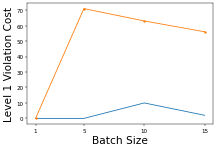

In [9]:
'''
graphing
'''

level_0_costs = [cost[0] for cost in cost_sums]
level_1_costs = [cost[1] for cost in cost_sums]
print(level_1_costs)
plt.figure(dpi=40)
# BATCH_SIZES = [5,10,15]
# plt.rcParams.update({'font.size': '10'})
plt.tight_layout()
x_axis = BATCH_SIZES
plt.plot(x_axis, level_0_costs, label="level 0")
plt.plot(x_axis, level_1_costs, label="level 1", marker='.')
plt.xticks(x_axis)
plt.xlabel("Batch Size", fontsize=19)
plt.ylabel("Level 1 Violation Cost", fontsize=19)
# plt.legend(title="Batch Size vs. Overall Cost")
plt.savefig('data\\NFM\\total_violation_vs_batch_size.eps',format='eps',dpi=1200)
plt.savefig('data\\NFM\\total_violation_vs_batch_size.png',dpi=216)



In [11]:
'''
extract timing information
'''
# print((time_buffer))
time_per_batch_size = [0 for i in range(len(BATCH_SIZES))]
for batch_size_index in range(len(BATCH_SIZES)):
    print(len(time_buffer[batch_size_index]))
    for system in time_buffer[batch_size_index]:
#         print(system)
        for round_index in range(len(system)):
            for tower_index in range(len(system[round_index])):
                time_per_batch_size[batch_size_index] += system[round_index][tower_index][0]
                time_per_batch_size[batch_size_index] += system[round_index][tower_index][1]

print(time_per_batch_size)

350
70
35
24
[15.891614499999832, 6.612314799999986, 32.456863000000176, 161.93070389999951]
